In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
from IPython.display import Image, clear_output

주차공간 데이터셋: https://public.roboflow.com/object-detection/pklot

In [3]:
!git clone https://github.com/ultralytics/yolov5
%cd /content/yolov5
!pip install -qr requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 14927, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 14927 (delta 7), reused 6 (delta 0), pack-reused 14908
Receiving objects: 100% (14927/14927), 13.95 MiB | 21.80 MiB/s, done.
Resolving deltas: 100% (10251/10251), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.7 MB/s eta 0:00:00


In [4]:
%mkdir /content/yolov5/pklot
%cd /content/yolov5/pklot

/content/yolov5/pklot


In [ ]:
!curl -L 'https://public.roboflow.com/ds/7Z8WVIlrpT?key=erxxl3zoxp'> roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
# yolov5s.pt 적용하여 추가 학습없이 detecting
%cd /content/yolov5
!python detect.py --weights yolov5s.pt --img 416 --conf 0.25 --source pklot/test/images

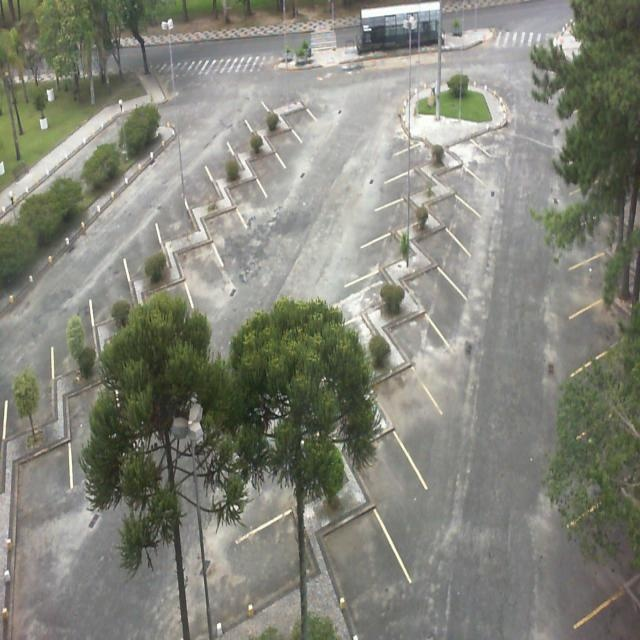

In [7]:
import glob
import random
from IPython.display import Image, display

image_name = random.choice(glob.glob('/content/yolov5/runs/detect/exp/*.jpg'))
display(Image(filename=image_name))

In [8]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line,cell):
  with open(line,'w') as f:
    f.write(cell.format(**globals()))

In [9]:
%cat /content/yolov5/pklot/data.yaml

train: ../train/images
val: ../valid/images

nc: 2
names: ['space-empty', 'space-occupied']

In [10]:
%%writetemplate /content/yolov5/pklot/data.yaml
train: ./pklot/train/images
test: ./pklot/test/images
val: ./pklot/valid/images

nc: 2
names: ['space-empty', 'space-occupied']

In [11]:
%cat /content/yolov5/pklot/data.yaml

train: ./pklot/train/images
test: ./pklot/test/images
val: ./pklot/valid/images

nc: 2
names: ['space-empty', 'space-occupied']


In [12]:
import yaml

with open('/content/yolov5/pklot/data.yaml','r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])
print(num_classes)

2


In [13]:
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [14]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [15]:
%cat /content/yolov5/models/custom_yolov5s.yaml


# Parameters
nc: 2  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, Fa

학습(Training)
- img : 입력 이미지 크기 정의
- batch : 배치 크기 결정
- epochs : 학습 기간 개수 정의
- data : yaml 파일 경로
- cfg : 모델 구성 지정
- weights : 가중치에 대한 경로 지정
- name : 결과 이름
- nosave : 최종 체크포인트만 저장
- cache : 빠른 학습을 위한 이미지 캐시

In [16]:
%%time
%cd /content/yolov5
!python train.py --img 640 --batch 32 --epochs 10 --data ./pklot/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name pklot_results --cache

/content/yolov5
train: weights=, cfg=./models/custom_yolov5s.yaml, data=./pklot/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=pklot_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, f

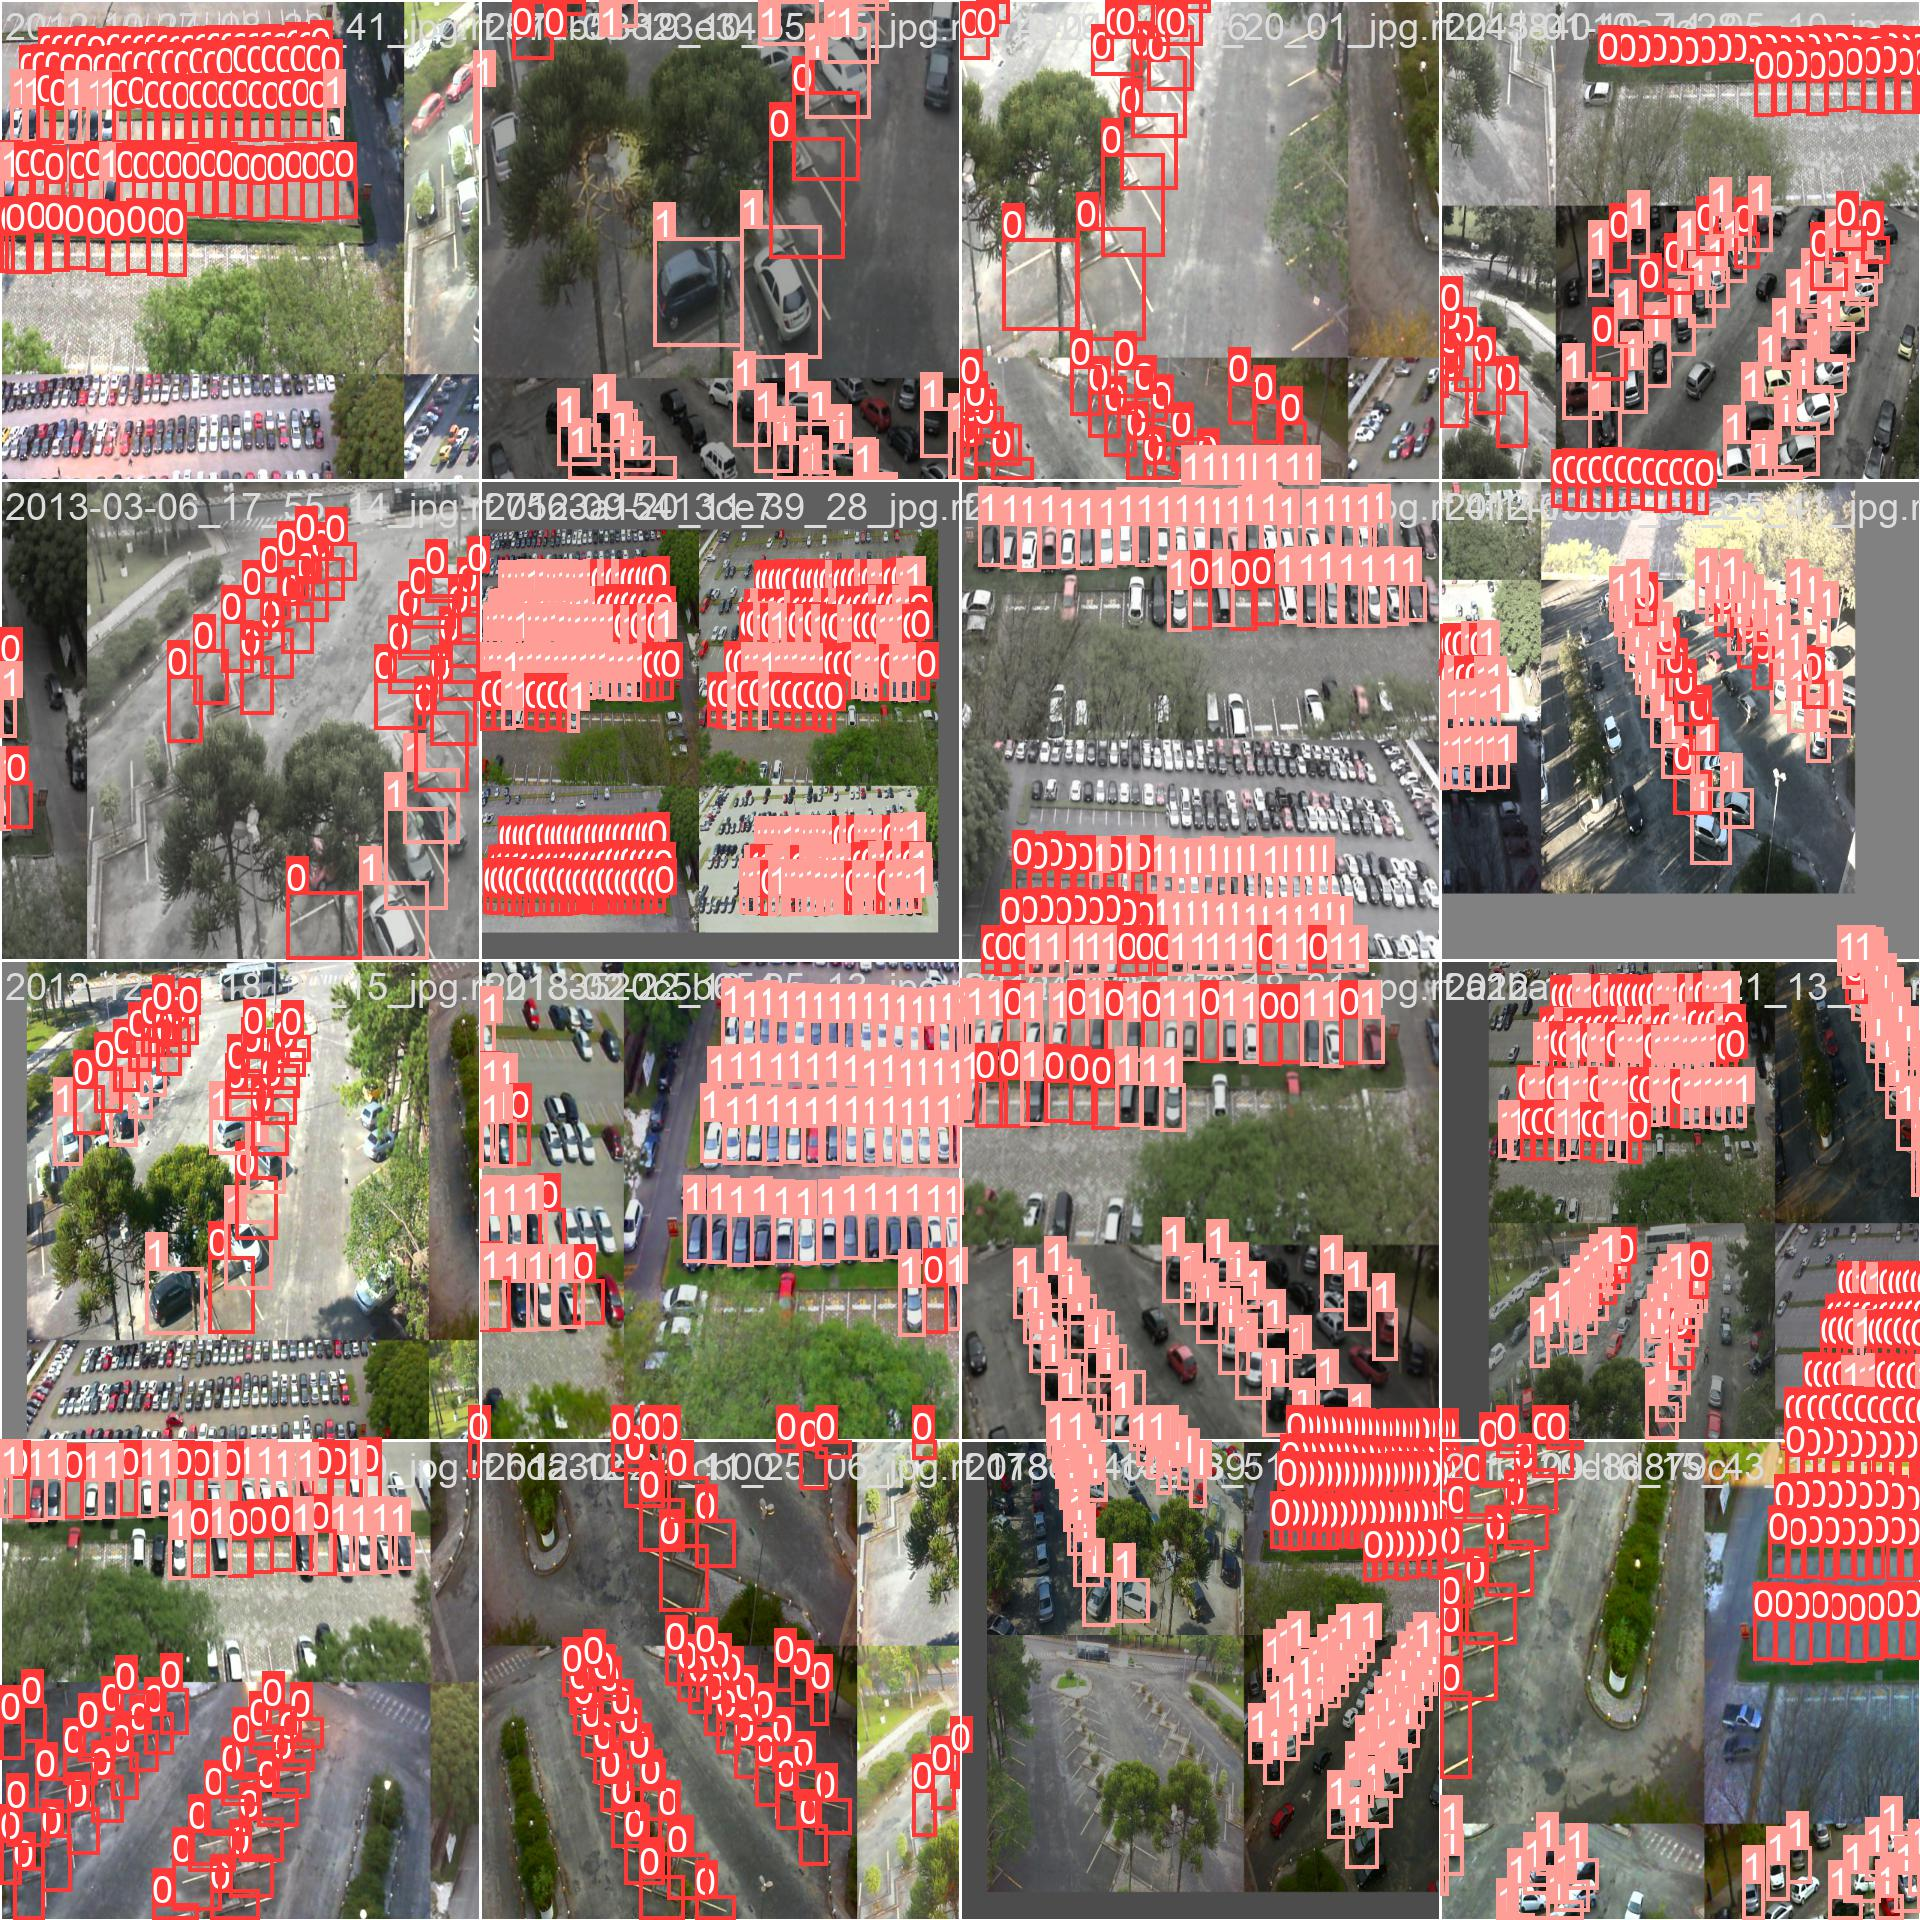

In [17]:
from IPython.display import Image, display
Image(filename = '/content/yolov5/runs/train/pklot_results/train_batch0.jpg', width = 1000)

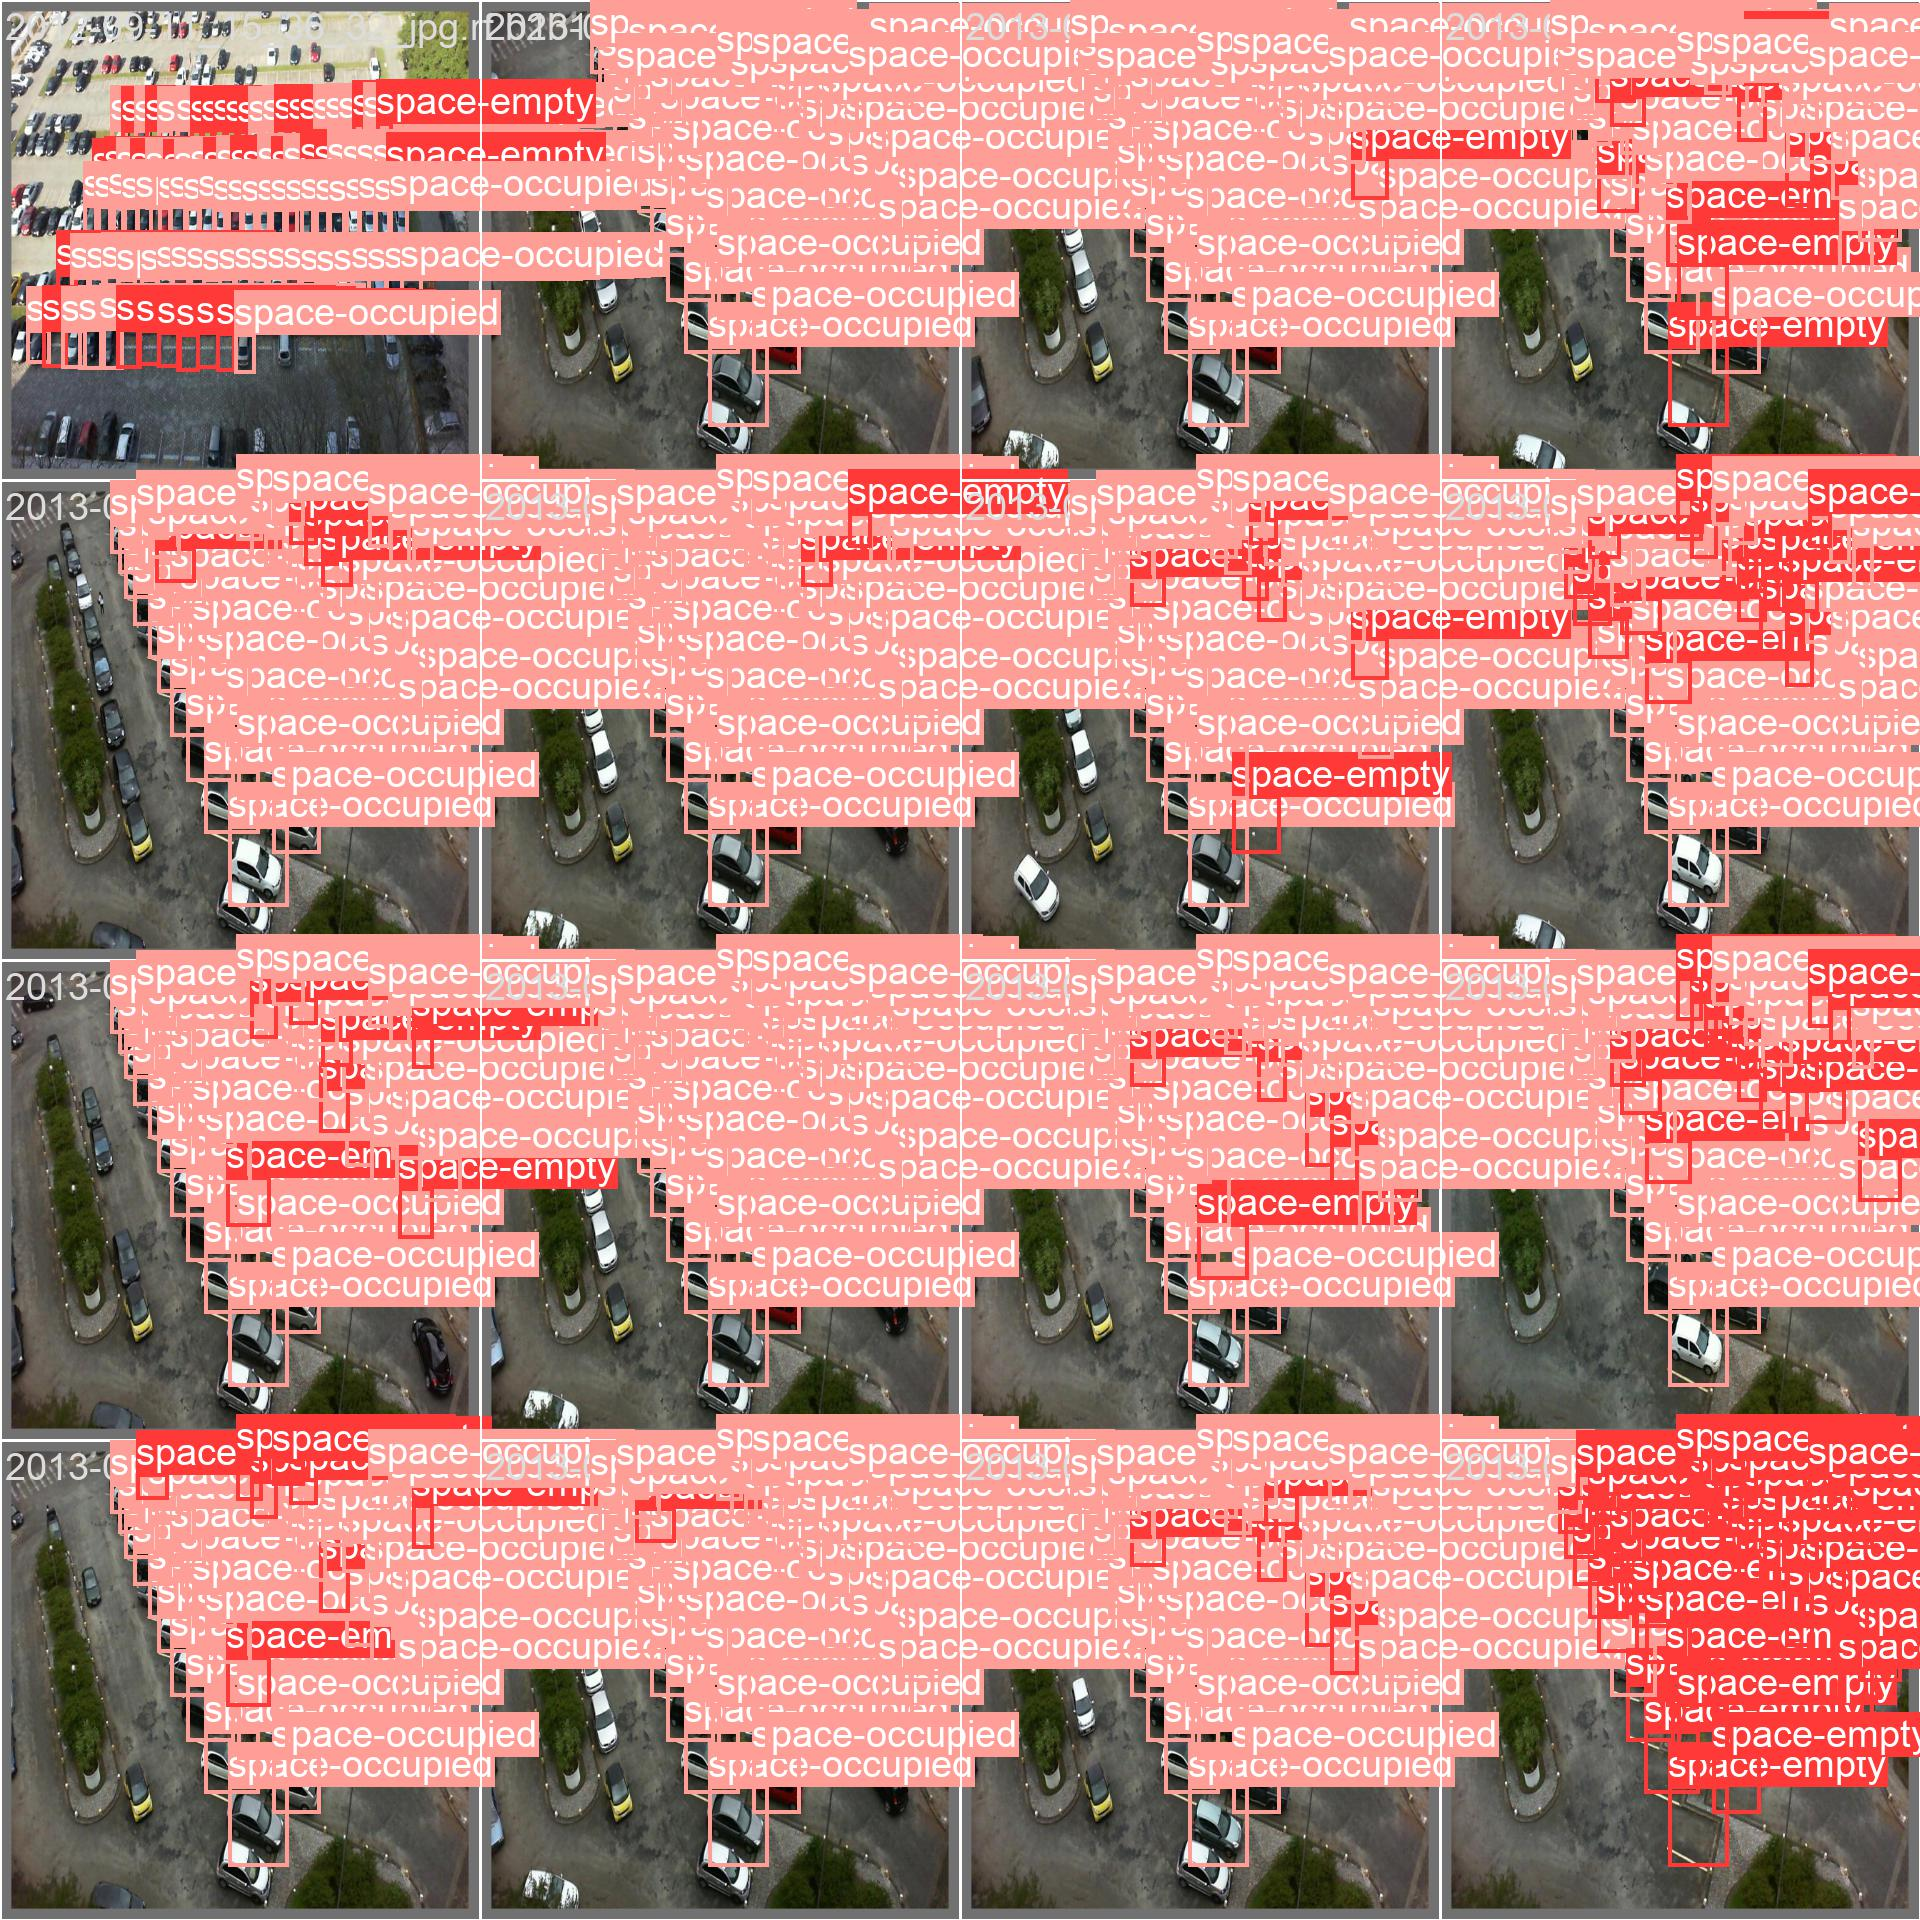

In [18]:
Image(filename = '/content/yolov5/runs/train/pklot_results/val_batch0_labels.jpg', width = 1000)

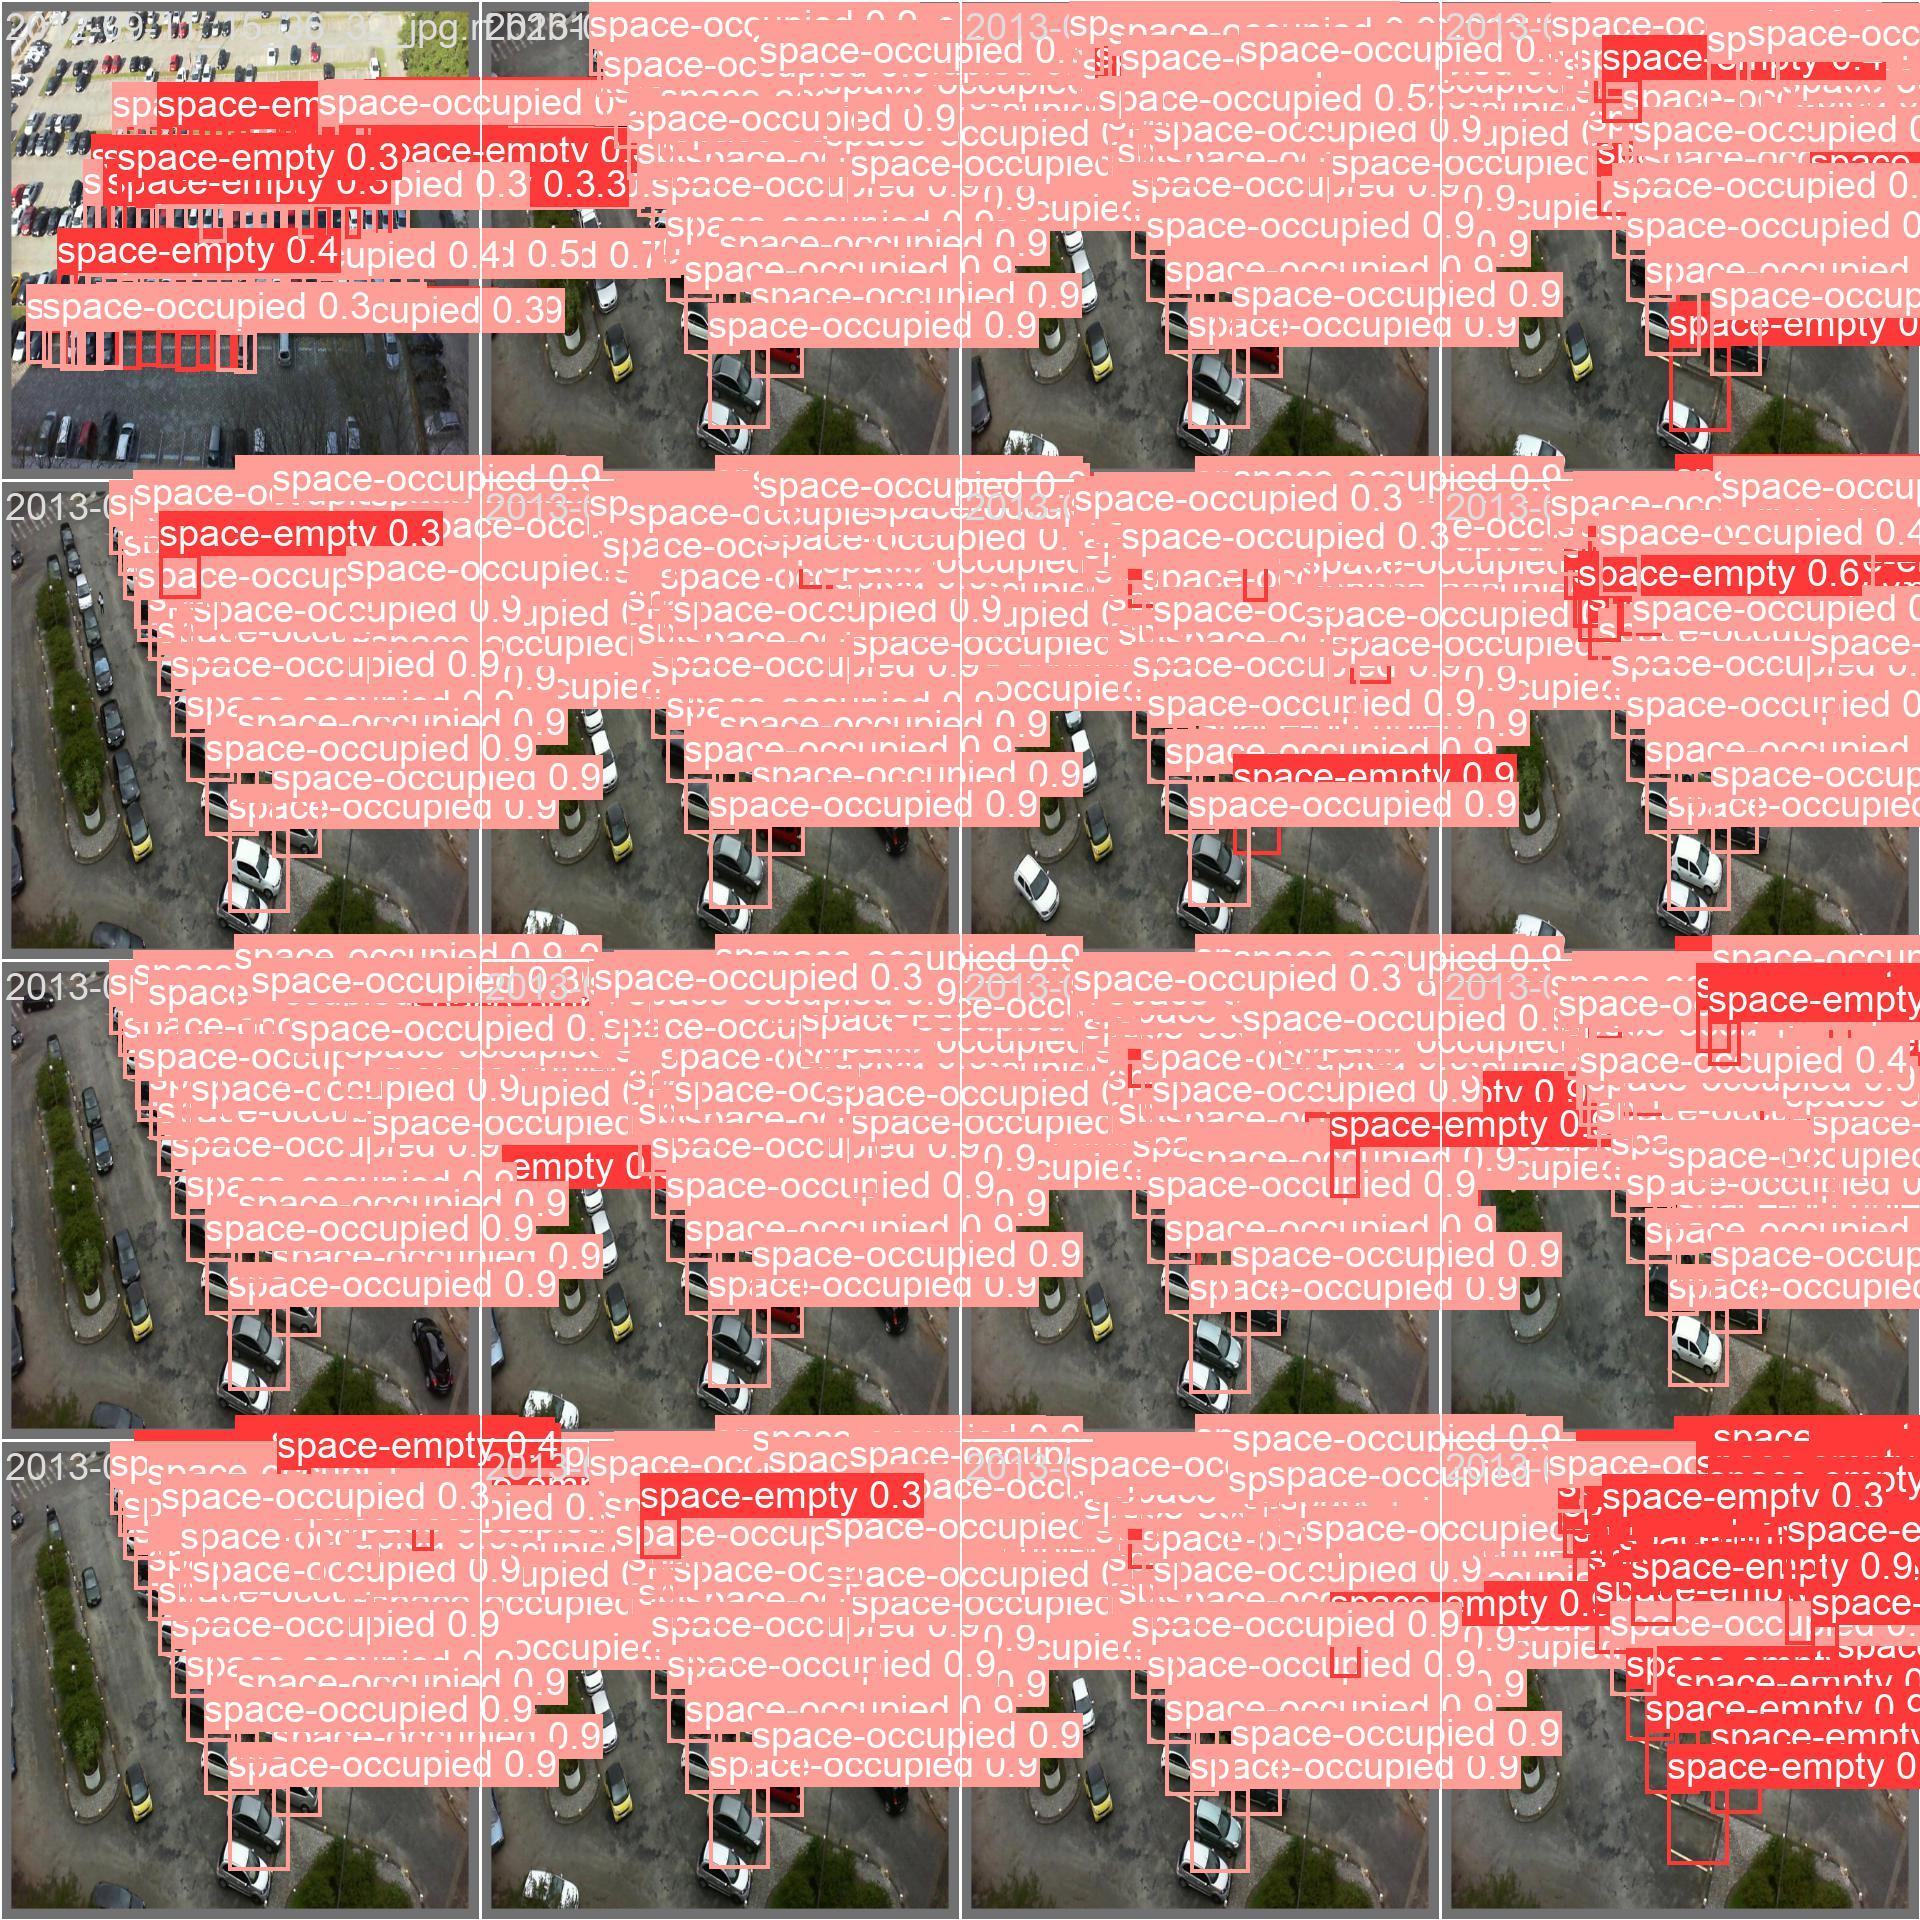

In [19]:
Image(filename = '/content/yolov5/runs/train/pklot_results/val_batch0_pred.jpg', width = 1000)

In [21]:
#검증
!python val.py --weights runs/train/pklot_results/weights/best.pt --data ./pklot/data.yaml --img 640 --iou 0.65

val: data=./pklot/data.yaml, weights=['runs/train/pklot_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolov5/pklot/valid/labels.cache... 2483 images, 59 backgrounds, 0 corrupt: 100% 2483/2483 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:   1% 1/78 [00:01<02:11,  1.71s/it]WARNING ⚠️ NMS time limit 2.100s exceeded
                 Class     Images  Instances          P          R      mAP50   mAP50-95:   4% 3/78 [00:10<04:19,  3.46s/it]WARNING ⚠️ NMS time limi

In [ ]:
!python detect.py --weights runs/train/pklot_results/weights/best.pt --img 640 --conf 0.4 --source ./pklot/test/images

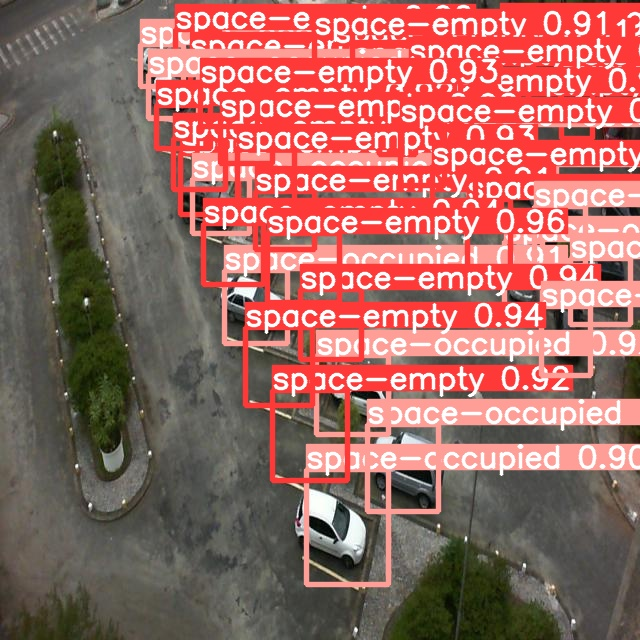

In [23]:
import glob
import random
from IPython.display import Image, display

image_name = random.choice(glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'))
display(Image(filename=image_name))

In [28]:
#모델 내보내기
%cp /content/yolov5/runs/train/pklot_results/weights/best.pt /content/drive/MyDrive/best_ex2.pt